In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv("zomato_new.csv")

In [3]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [4]:
df.drop(["online_order","listed_in(type)",'listed_in(city)'],axis=1,inplace=True)

In [5]:
#df.dropna(inplace=True)

In [6]:
#df.drop(["online_order",'listed_in(type)',"location","rate",'listed_in(city)','cuisines'],axis=1,inplace=True)

In [7]:
X=pd.get_dummies(df.drop("approx_cost(for two people)",axis=1),drop_first=True)
y=df["approx_cost(for two people)"]

In [8]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler

# load the data

# select categorical variables
#cat_vars = X.select_dtypes(include=['object']).columns

# perform ordinal encoding
#encoder = OrdinalEncoder()
#X[cat_vars] = encoder.fit_transform(X[cat_vars])

# select numerical variables
#num_vars = X.select_dtypes(include=['float', 'int']).columns

# perform min-max scaling
#scaler = MinMaxScaler()
#X[num_vars] = scaler.fit_transform(X[num_vars])

# save the preprocessed data
df.to_csv("preprocessed_data.csv", index=False)


In [9]:
df.isnull().sum()

name                           0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
cuisines                       0
approx_cost(for two people)    0
dtype: int64

In [10]:
df

,name,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people)
0,800.0,1,4.1,775,0.017518,0.199741,500.0,800.0
1,800.0,0,4.1,787,0.017518,0.199741,500.0,800.0
2,800.0,0,3.8,918,0.017518,0.175900,500.0,800.0
3,300.0,0,3.7,88,0.017518,0.374326,300.0,300.0
4,600.0,0,3.8,166,0.013226,0.199741,500.0,600.0
...,...,...,...,...,...,...,...,...
51712,1500.0,0,3.6,27,0.041456,0.175900,550.0,1500.0
51713,600.0,0,3.7,0,0.041456,0.175900,1500.0,600.0
51714,2000.0,0,3.7,0,0.041456,0.175900,1500.0,2000.0
51715,2500.0,1,4.3,236,0.091015,0.175900,1500.0,2500.0


In [11]:
X

,name,book_table,rate,votes,location,rest_type,cuisines
0,800.0,1,4.1,775,0.017518,0.199741,500.0
1,800.0,0,4.1,787,0.017518,0.199741,500.0
2,800.0,0,3.8,918,0.017518,0.175900,500.0
3,300.0,0,3.7,88,0.017518,0.374326,300.0
4,600.0,0,3.8,166,0.013226,0.199741,500.0
...,...,...,...,...,...,...,...
51712,1500.0,0,3.6,27,0.041456,0.175900,550.0
51713,600.0,0,3.7,0,0.041456,0.175900,1500.0
51714,2000.0,0,3.7,0,0.041456,0.175900,1500.0
51715,2500.0,1,4.3,236,0.091015,0.175900,1500.0


In [12]:
import pandas as pd
import statsmodels.api as sm



# Add a constant to the independent variables for the intercept
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())
X.drop("const",axis=1,inplace=True)


                                 OLS Regression Results                                
Dep. Variable:     approx_cost(for two people)   R-squared:                       0.981
Model:                                     OLS   Adj. R-squared:                  0.981
Method:                          Least Squares   F-statistic:                 3.884e+05
Date:                         Mon, 30 Jan 2023   Prob (F-statistic):               0.00
Time:                                 22:15:52   Log-Likelihood:            -2.8498e+05
No. Observations:                        51717   AIC:                         5.700e+05
Df Residuals:                            51709   BIC:                         5.700e+05
Df Model:                                    7                                         
Covariance Type:                     nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [13]:
# Importing libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset


# Encode categorical variables and scale numerical variables
le = LabelEncoder()
mm_scaler = MinMaxScaler()


# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the regression models
models = [LinearRegression(),
          DecisionTreeRegressor(random_state=42),
          RandomForestRegressor(random_state=42),
          KNeighborsRegressor(),
          xgb.XGBRegressor(random_state=42)]

# Train and evaluate the models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred,squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model.__class__.__name__}:")
    print(f"\tMSE: {mse:.4f}")
    print(f"\tMAE: {mae:.4f}")
    print(f"\tR2: {r2:.4f}")


LinearRegression:
	MSE: 54.9660
	MAE: 15.4096
	R2: 0.9837
DecisionTreeRegressor:
	MSE: 34.6102
	MAE: 5.0256
	R2: 0.9935
RandomForestRegressor:
	MSE: 33.0958
	MAE: 7.0362
	R2: 0.9941
KNeighborsRegressor:
	MSE: 46.4451
	MAE: 12.5581
	R2: 0.9884
XGBRegressor:
	MSE: 40.4510
	MAE: 14.3214
	R2: 0.9912


Feature ranking:
1. feature 0 (0.981769)
2. feature 3 (0.006049)
3. feature 5 (0.003728)
4. feature 4 (0.003540)
5. feature 2 (0.002292)
6. feature 6 (0.001500)
7. feature 1 (0.001122)


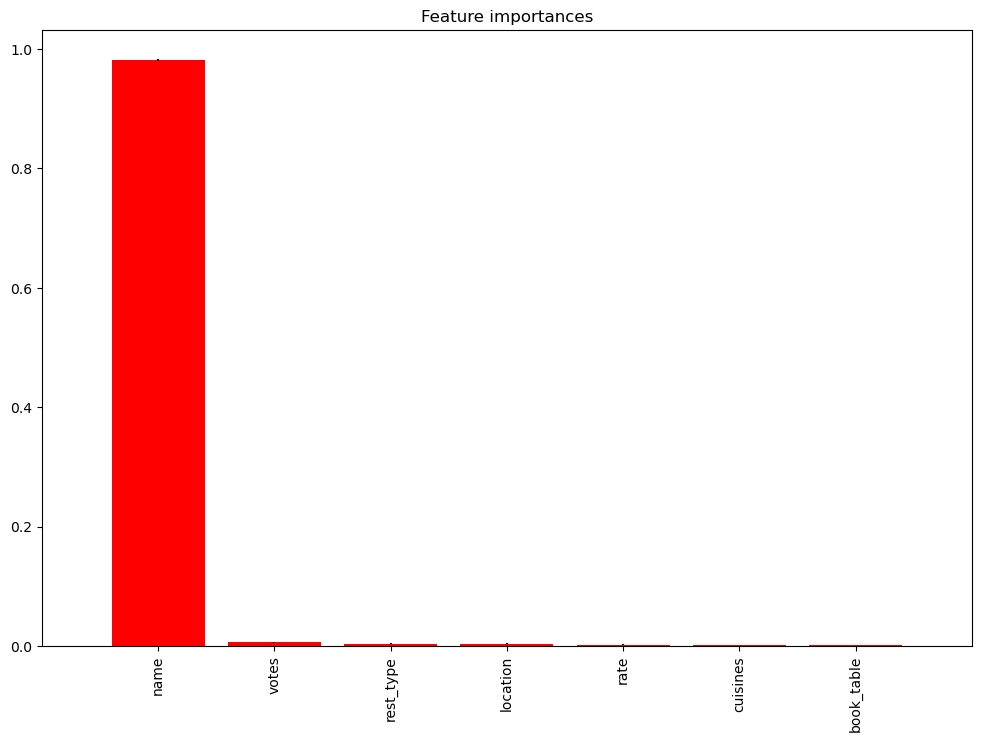

In [14]:
import matplotlib.pyplot as plt 
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(X_train, y_train)

# Plotting feature importance
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(12, 8))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()